EMAIL SPAM DETECTION USING MACHINE LEARNING TECHNIQUES

THIS PROJECT OS DONE BY SAKSHI K MORE

loading all the required libraries

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import datetime as dt
import string
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
from collections import Counter

In [114]:
email_data=pd.read_csv('spam.csv',encoding='latin-1')
email_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [115]:
email_data.shape

(5572, 5)

In [116]:
email_data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [117]:
email_data=email_data.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'],axis=1)

In [118]:
email_data.columns

Index(['v1', 'v2'], dtype='object')

In [119]:
email_data.rename(columns={'v1':'Category','v2':'Text'},inplace=True)

In [120]:
email_data.describe()

,Category,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [121]:
email_data.isnull().sum()

Category    0
Text        0
dtype: int64

In [122]:
email_data.duplicated().sum()

403

In [123]:
email_data=email_data.drop_duplicates(keep='first')

In [124]:
email_data.isna().sum()

Category    0
Text        0
dtype: int64

In [125]:
email_data['Category'].value_counts()

ham     4516
spam     653
Name: Category, dtype: int64

In [126]:
spam_data=email_data[email_data['Category']=='spam']

In [127]:
ham_data=email_data[email_data['Category']=='ham']

In [128]:
ham_sample=ham_data.sample(653)

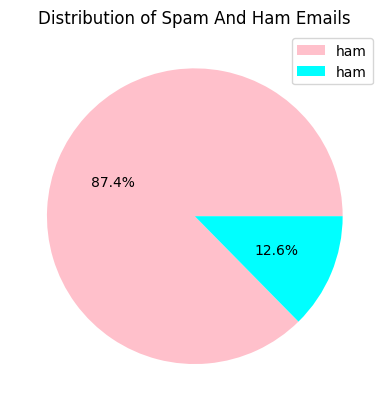

In [129]:
plt.pie(email_data['Category'].value_counts(),colors=['pink','cyan'],autopct='%1.1f%%')
plt.title('Distribution of Spam And Ham Emails')
plt.legend(email_data['Category'],loc='upper right')

In [130]:
email_data['Len_text']=email_data['Text'].apply(len)

In [131]:
email_data.head()

,Category,Text,Len_text
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [132]:
plt.figure(figsize=(10,10))
spam_data['Len_text'].plot(bins=30,kind='hist')
ham_sample['Len_text'].plot(bins=30,kind='hist',color='cyan')

KeyError: ignored

<Figure size 1000x1000 with 0 Axes>

In [133]:
email_data['Category_label']=email_data['Category'].map({'spam':1,'ham':2})

In [134]:
email_data.head()

,Category,Text,Len_text,Category_label
0,ham,"Go until jurong point, crazy.. Available only ...",111,2
1,ham,Ok lar... Joking wif u oni...,29,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,ham,U dun say so early hor... U c already then say...,49,2
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [135]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [136]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [137]:
def transform(text):
  text=text.lower()
  text=nltk.word_tokenize(text)


  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  text=y[:]
  y.clear
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

    return " ".join(y)

In [138]:
email_data['Clean_mails']=email_data['Text'].apply(transform)

In [139]:
email_data.head()

,Category,Text,Len_text,Category_label,Clean_mails
0,ham,"Go until jurong point, crazy.. Available only ...",111,2,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,2,ok lar joking wif u oni ok
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,2,u dun say so early hor u c already then say u
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,nah i do think he goes to usf he lives around ...


In [140]:
spam_data.head()

,Category,Text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [141]:
spam_data.describe()

,Category,Text
count,653,653
unique,1,653
top,spam,Free entry in 2 a wkly comp to win FA Cup fina...
freq,653,1


In [142]:
ham_sample.head()

,Category,Text
3773,ham,Ok... But bag again..
3863,ham,A pure hearted person can have a wonderful smi...
3232,ham,Height of recycling: Read twice- People spend ...
2135,ham,"Carlos took a while (again), we leave in a minute"
3788,ham,Are you sure you don't mean \get here


In [143]:
ham_sample.describe()

,Category,Text
count,653,653
unique,1,653
top,ham,Ok... But bag again..
freq,653,1


In [144]:
email_data.head()

,Category,Text,Len_text,Category_label,Clean_mails
0,ham,"Go until jurong point, crazy.. Available only ...",111,2,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,2,ok lar joking wif u oni ok
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,2,u dun say so early hor u c already then say u
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,nah i do think he goes to usf he lives around ...


In [152]:
email_data.head()

,Category,Text,Len_text,Category_label,Clean_mails
0,ham,"Go until jurong point, crazy.. Available only ...",111,2,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,29,2,ok lar joking wif u oni ok
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,49,2,u dun say so early hor u c already then say u
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2,nah i do think he goes to usf he lives around ...


In [155]:
email_data.isna().sum()

Category          0
Text              0
Len_text          0
Category_label    0
Clean_mails       5
dtype: int64

In [157]:
email_data.dropna(inplace=True)

In [158]:
tfidf=TfidfVectorizer()

In [159]:
x=tfidf.fit_transform(email_data['Clean_mails']).toarray()

In [160]:
y=email_data['Category_label'].values

In [161]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=3)

In [162]:
lr=LogisticRegression()

In [163]:
lr.fit(x_train,y_train)

LogisticRegression()

In [164]:
prediction=lr.predict(x_test)

In [167]:
acc_score=accuracy_score(y_test,prediction)

In [168]:
print('The accuracy of Logistic Regression Model is : ',acc_score)

The accuracy of Logistic Regression Model is :  0.9486931268151017


In [172]:
input=["Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."]
in_feature=tfidf.transform(input)
predict=lr.predict(in_feature)
print(predict)
if predict[0]==1:
  print("This is a Spam Mail")
else:
  print("This is a Ham Mail")

[2]
This is a Ham Mail
